# 1.1 Fundamentos de la técnica

La **Regresión Logística** es un algoritmo de aprendizaje supervisado utilizado principalmente para tareas de **clasificación** (no de regresión, a pesar de su nombre). Su objetivo es predecir la probabilidad de que una instancia pertenezca a una clase determinada (por ejemplo: *Sí/No*, *Aprobado/Reprobado*, *0/1*).

A diferencia de la Regresión Lineal, que predice valores continuos infinitos, la Regresión Logística transforma la salida utilizando la **función sigmoide** para acotar el resultado entre 0 y 1. Si la probabilidad es mayor a un umbral (generalmente 0.5), se clasifica como la clase positiva (1); de lo contrario, es la clase negativa (0).

# 1.2 Modelo Matemático

El núcleo de la Regresión Logística es la **Función Sigmoide** (o Logística). Esta función toma cualquier número real y lo "aplasta" en un rango entre 0 y 1.

La ecuación del modelo para calcular la probabilidad es:

$$P(Y=1|X) = \frac{1}{1 + e^{-z}}$$

Donde:
* $P(Y=1|X)$: Es la probabilidad de que la variable objetivo sea 1 dado los datos $X$.
* $e$: Base del logaritmo natural.
* $z$: Es la combinación lineal de las variables de entrada (similar a la regresión lineal):

$$z = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$$

El algoritmo de entrenamiento busca los coeficientes $\beta$ (pesos) que minimizan el error de clasificación.

# 1.3 Descripción de la librería y clases

Para esta implementación utilizaremos **Scikit-Learn (sklearn)**, la librería estándar de la industria para Machine Learning en Python.

* **`sklearn.linear_model.LogisticRegression`**: Clase principal. Implementa el algoritmo de regresión logística. Permite ajustar (entrenar) el modelo y predecir.
* **`train_test_split`**: Función esencial para dividir el dataset en dos subconjuntos:
    * *Train:* Para que el modelo aprenda.
    * *Test:* Para evaluar qué tan bien funciona ante datos nuevos.
* **`confusion_matrix`**: Herramienta de evaluación que cuenta los aciertos y errores (Falsos Positivos/Negativos).
* **`accuracy_score`**: Métrica que calcula el porcentaje de predicciones correctas totales.
* **`pandas`** y **`numpy`**: Para la manipulación de estructuras de datos y cálculos numéricos.
* **`matplotlib` / `seaborn`**: Para la visualización gráfica de los datos y resultados.

In [ ]:
# --- 1.4 PIPELINE ---
# Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs # Para generar datos de ejemplo

# Configuración de estilo
sns.set(style="whitegrid")
print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 1.4.1 Preprocesamiento y Análisis Estadístico

En esta etapa simularemos un dataset (datos sintéticos) que contiene dos características (*Feature 1* y *Feature 2*) y dos posibles clases (*0 y 1*).

Realizaremos:
1.  Generación de datos.
2.  Cálculo de estadísticas básicas (Promedio, Desviación Estándar, Máximos y Mínimos).
3.  Visualización mediante un **Gráfico de Dispersión** para entender la separabilidad de las clases.

--- Estadísticas Descriptivas ---
Target                    0           1
Feature_1 count  150.000000  150.000000
          mean    -2.627455    4.706745
          std      2.715487    2.780612
          min    -11.584746   -2.280726
          25%     -4.502773    2.815573
          50%     -2.520935    4.854321
          75%     -1.067073    6.442183
          max      3.971846   13.260745
Feature_2 count  150.000000  150.000000
          mean     9.053672    1.825003
          std      2.791724    2.628060
          min      3.449093   -4.472210
          25%      7.186174   -0.187294
          50%      9.352615    1.531308
          75%     10.849023    3.565505
          max     19.801934    8.331110


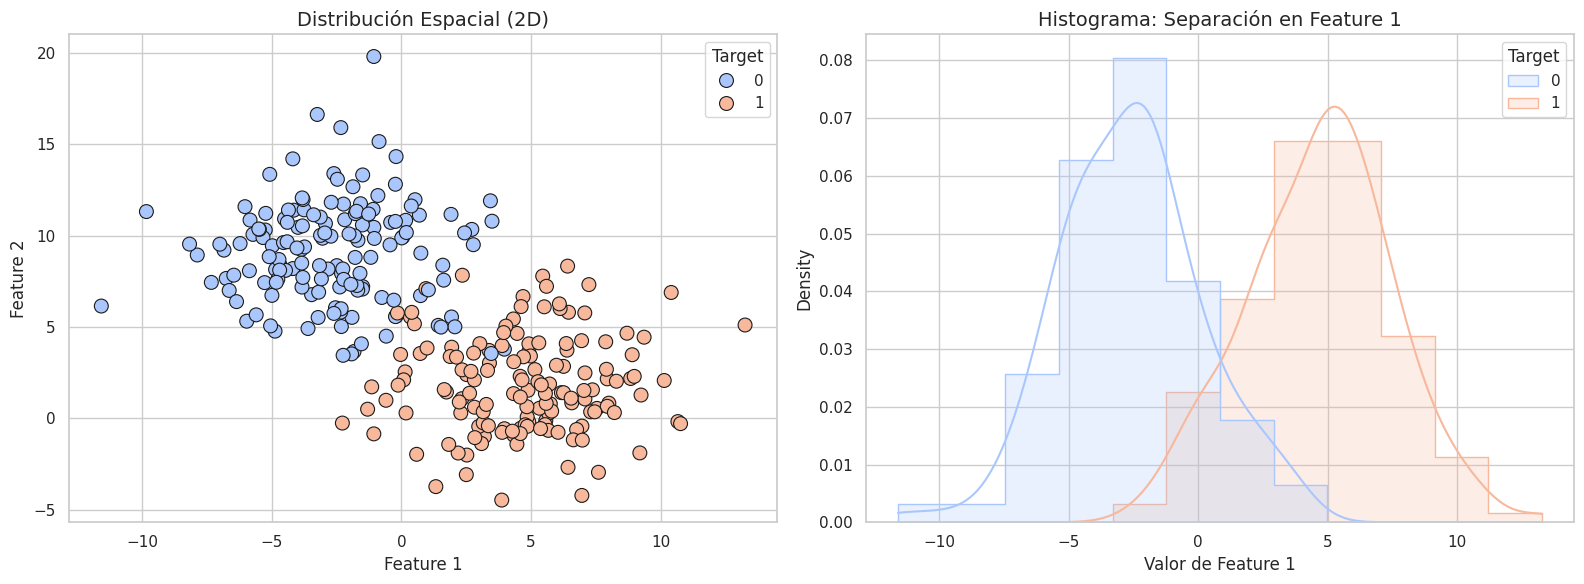

In [ ]:
# --- 1.4.1 PREPROCESAMIENTO ---

# 1. Generación del Dataset
X, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=2.8, random_state=42)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

# 2. Análisis Estadístico Descriptivo
print("--- Estadísticas Descriptivas ---")
print(df.groupby('Target').describe().T)

# 3. Visualización Avanzada
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico A: Dispersión (Scatter) - LADO IZQUIERDO
sns.scatterplot(ax=axes[0], data=df, x='Feature_1', y='Feature_2', hue='Target', palette='coolwarm', s=100, edgecolor='k')
axes[0].set_title('Distribución Espacial (2D)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Gráfico B: Histograma de la Feature 1 - LADO DERECHO
# Quitamos el parámetro 'col' y usamos directamente el DataFrame original
sns.histplot(ax=axes[1], data=df, x='Feature_1', hue='Target', kde=True, element="step", stat="density", palette='coolwarm')
axes[1].set_title('Histograma: Separación en Feature 1', fontsize=14)
axes[1].set_xlabel('Valor de Feature 1')

plt.tight_layout()
plt.show()

## 1.4.2 Entrenamiento y Predicción

Aquí ocurre el proceso de aprendizaje:
1.  Separamos los datos (80% entrenamiento, 20% validación).
2.  Entrenamos el objeto `LogisticRegression`.
3.  Creamos una función personalizada `predecir_patron` que toma valores manuales y nos dice a qué clase pertenecen según el modelo.

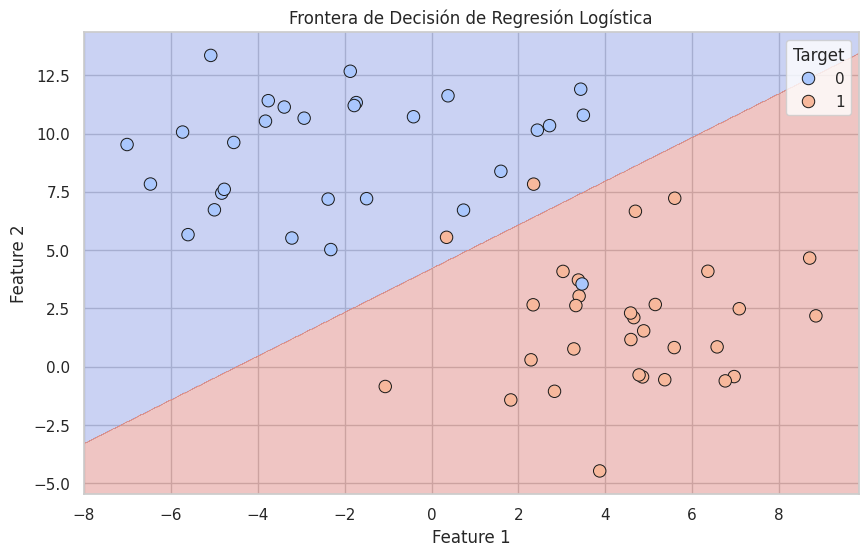

In [ ]:
# --- ENTRENAMIENTO Y VISUALIZACIÓN DE FRONTERA ---

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(df[['Feature_1', 'Feature_2']], df['Target'], test_size=0.2, random_state=42)

# Entrenar modelo
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)

# Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model):
    # Definir límites del gráfico
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Crear una malla (grid) de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predecir sobre toda la malla
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Feature_1', 'Feature_2']))
    Z = Z.reshape(xx.shape)

    # Graficar contornos y puntos
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm') # Fondo de predicción
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', edgecolor='k', s=80)
    plt.title('Frontera de Decisión de Regresión Logística')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Ejecutar visualización con los datos de TEST
plot_decision_boundary(X_test, y_test, modelo_lr)

## 1.4.3 Evaluación del Modelo

Para validar el modelo, utilizamos el set de prueba (`X_test`) y comparamos las predicciones con la realidad (`y_test`).

Evaluaremos:
* **Matriz de Confusión:** Para ver detalladamente dónde se equivoca el modelo.
* **Accuracy (Exactitud):** La métrica global de desempeño.

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.94      0.95        31

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



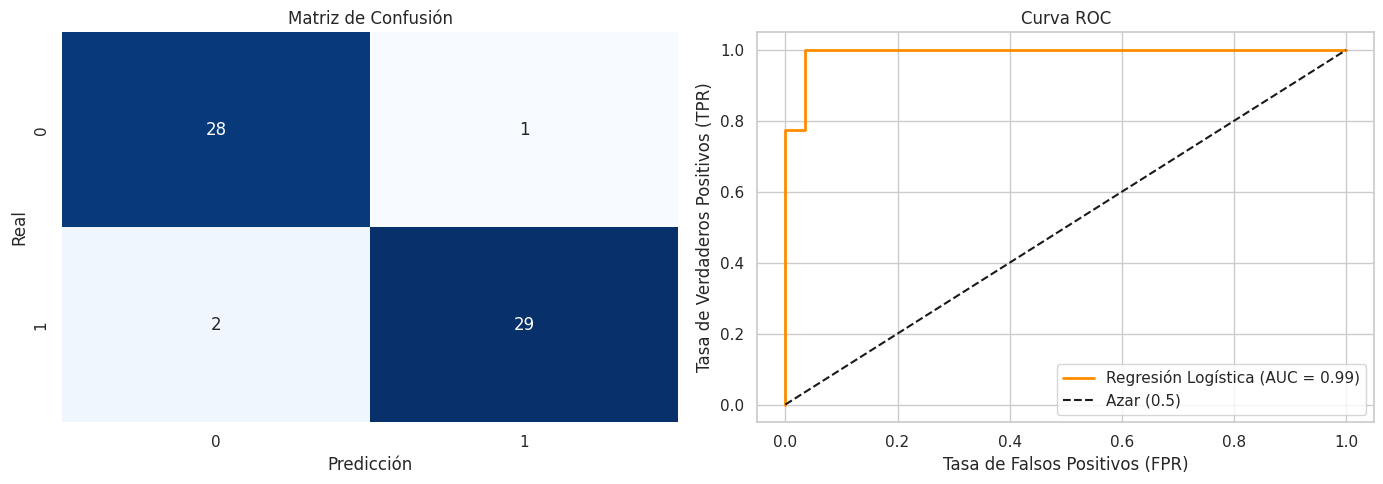

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# Predicciones
y_pred = modelo_lr.predict(X_test)
y_prob = modelo_lr.predict_proba(X_test)[:, 1] # Probabilidad de clase 1

# 1. Reporte de Clasificación Completo
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# 2. Matriz de Confusión y Curva ROC (Gráficos lado a lado)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Confusión')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

axes[1].plot(fpr, tpr, label=f'Regresión Logística (AUC = {auc_score:.2f})', color='darkorange', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Azar (0.5)') # Línea diagonal
axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[1].set_title('Curva ROC')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## 1.4.4 Visualización de la Curva Sigmoide (La "S" Logística)

Tal como vimos en el **Modelo Matemático**, la regresión logística utiliza una curva en forma de "S" para comprimir los valores entre 0 y 1.

En el siguiente gráfico visualizaremos exactamente esa curva utilizando nuestros datos de prueba:
* **Eje X (Valor z):** Es la suma ponderada de las características ($z = \beta_0 + \beta_1X_1 + ...$).
* **Eje Y (Probabilidad):** La probabilidad calculada de que sea Clase 1.
* **Puntos:** Los puntos azules y naranjas representan los datos reales (0 o 1).

Observa cómo la curva roja intenta "encajar" entre los puntos de arriba (1) y los de abajo (0).

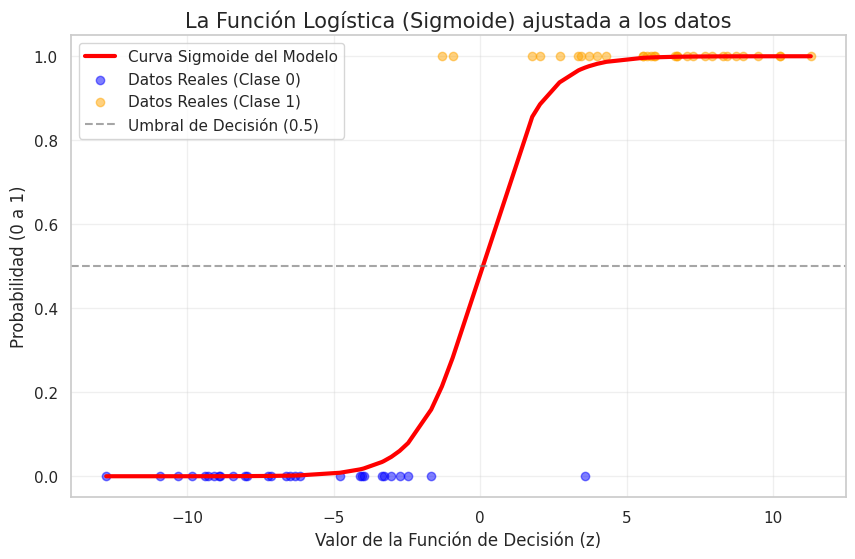

In [ ]:
# --- VISUALIZACIÓN DE LA CURVA SIGMOIDE ---

# 1. Obtenemos los valores de "z" (la función de decisión) del modelo
# z = b0 + b1*x1 + b2*x2 ...
z_scores = modelo_lr.decision_function(X_test)

# 2. Obtenemos las probabilidades calculadas (la curva S)
probs = modelo_lr.predict_proba(X_test)[:, 1]

# 3. Ordenamos los valores para que la línea se dibuje suavemente
indices_ordenados = np.argsort(z_scores)
z_ordenado = z_scores[indices_ordenados]
probs_ordenadas = probs[indices_ordenados]

# 4. Generación del Gráfico
plt.figure(figsize=(10, 6))

# Dibujamos la Curva Sigmoide (Línea Roja)
plt.plot(z_ordenado, probs_ordenadas, color='red', linewidth=3, label='Curva Sigmoide del Modelo')

# Dibujamos los datos reales (Puntos dispersos arriba y abajo)
# Los separamos por color según si eran realmente 0 o 1
plt.scatter(z_scores[y_test==0], y_test[y_test==0], color='blue', alpha=0.5, label='Datos Reales (Clase 0)')
plt.scatter(z_scores[y_test==1], y_test[y_test==1], color='orange', alpha=0.5, label='Datos Reales (Clase 1)')

# Línea de umbral (0.5)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label='Umbral de Decisión (0.5)')

plt.title('La Función Logística (Sigmoide) ajustada a los datos', fontsize=15)
plt.ylabel('Probabilidad (0 a 1)', fontsize=12)
plt.xlabel('Valor de la Función de Decisión (z)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Referencias Bibliográficas

1.  **Scikit-Learn Documentation:** *Logistic Regression*. Disponible en: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2.  **Google Colab:** *Welcome to Colaboratory*. Disponible en: [https://colab.research.google.com/](https://colab.research.google.com/)